In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [4]:
# import dataset
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:,-1].values

y = y.reshape(len(y), 1)

In [5]:
# feature scaling
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [6]:
# train svr model on whole dataset
regressor = SVR(kernel='rbf')
regressor.fit(x, y)

SVR()

In [7]:
# predict a new result
sc_y.inverse_transform(regressor.predict(sc_y.transform([[6.5]])))

array([87714.85539438])

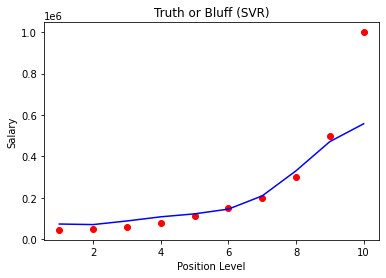

In [8]:
# visualize the svr results
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y), color='red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x)), color='blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

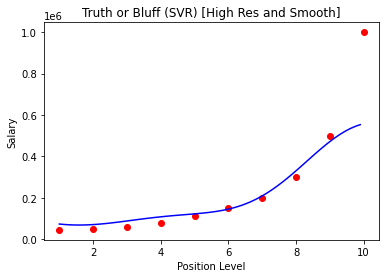

In [10]:
# visualize the svr results (high resolution and smoother curve)
x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))

plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color='red')
plt.plot(x_grid, sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid))), color='blue')
plt.title('Truth or Bluff (SVR) [High Res and Smooth]')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()